# **Neuropolis-X1**
### **Building an artificial intelligence system for human brain activity prediction (EEG, fMRI) with machine learning, deep learning, and large language models**

#### Maël Donoso, Ouroboros Neurotechnologies (https://ouroboros-neurotechnologies.com/)
First release: *18th March 2025*

This first extension (X1) of Neuropolis includes fourteen Notebooks:

*01: fMRI Preprocessing*

*02: EEG Preprocessing*

*03: Classification Models*

*04: Regression Models*

*05: Neural Networks*

*06: Convolutional Neural Networks*

*07: Recurrent Neural Networks*

*08: Transformers*

*09: Large Language Models*

*10: Large Language Model Chain-of-Thought*

*11: Large Language Model Fine-Tuning*

*12: Large Multimodal Model*

***13: Statistical Tests***

*14: Tables and Figures*

### Notebook 13

# **Statistical Tests**

## **1. Machine Learning**

We perform **Wilcoxon signed-rank tests** on the results of the machine learning models for the classification and regression tasks. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import scipy
import pingouin
from statsmodels.stats.contingency_tables import mcnemar

In [2]:
# Define the preprocessed data path. 
preprocessed_data_path = '../neuropolis-x1_preprocessed_data/'

# Define the results path. 
results_path = '../neuropolis-x1_results/'

In [3]:
# Load the targets. 
with open(preprocessed_data_path + 'dict_targets.p', 'rb') as file:
    dict_targets = pickle.load(file)
with open(preprocessed_data_path + 'classification/dict_targets_classification_sequence.p', 'rb') as file:
    dict_targets_class = pickle.load(file)
with open(preprocessed_data_path + 'regression/dict_targets_regression_sequence.p', 'rb') as file:
    dict_targets_reg = pickle.load(file)
with open(preprocessed_data_path + 'classification/dict_targets_classification_basis.p', 'rb') as file:
    dict_targets_foundation_models = pickle.load(file)

# Load the machine learning results for the classification task. 
with open(results_path + 'classification/dict_predictions_lr.p', 'rb') as file:
    dict_predictions_lr_class = pickle.load(file)
with open(results_path + 'classification/dict_predictions_knn.p', 'rb') as file:
    dict_predictions_knn_class = pickle.load(file)
with open(results_path + 'classification/dict_predictions_dt.p', 'rb') as file:
    dict_predictions_dt_class = pickle.load(file)
with open(results_path + 'classification/dict_predictions_rf.p', 'rb') as file:
    dict_predictions_rf_class = pickle.load(file)
with open(results_path + 'classification/dict_predictions_svm.p', 'rb') as file:
    dict_predictions_svm_class = pickle.load(file)
with open(results_path + 'classification/dict_predictions_xgb.p', 'rb') as file:
    dict_predictions_xgb_class = pickle.load(file)

In [4]:
# Define the list of subjects, removing sub-xp102 who has a missing condition. 
subjects = ['sub-xp1' + str(x).zfill(2) for x in range(1, 11)]
subjects.remove('sub-xp102')
subject = subjects[0]

# Retrieve and display the brain region names and the number of brain regions. 
brain_regions = list(dict_targets[subject]['eegfmriNF'].keys())
print(brain_regions)
print(len(brain_regions), 'brain regions')

['Background', 'Frontal Pole', 'Insular Cortex', 'Superior Frontal Gyrus', 'Middle Frontal Gyrus', 'Inferior Frontal Gyrus, pars triangularis', 'Inferior Frontal Gyrus, pars opercularis', 'Precentral Gyrus', 'Temporal Pole', 'Superior Temporal Gyrus, anterior division', 'Superior Temporal Gyrus, posterior division', 'Middle Temporal Gyrus, anterior division', 'Middle Temporal Gyrus, posterior division', 'Middle Temporal Gyrus, temporooccipital part', 'Inferior Temporal Gyrus, anterior division', 'Inferior Temporal Gyrus, posterior division', 'Inferior Temporal Gyrus, temporooccipital part', 'Postcentral Gyrus', 'Superior Parietal Lobule', 'Supramarginal Gyrus, anterior division', 'Supramarginal Gyrus, posterior division', 'Angular Gyrus', 'Lateral Occipital Cortex, superior division', 'Lateral Occipital Cortex, inferior division', 'Intracalcarine Cortex', 'Frontal Medial Cortex', 'Juxtapositional Lobule Cortex (formerly Supplementary Motor Cortex)', 'Subcallosal Cortex', 'Paracingulate

In [5]:
# Define a function to create the DataFrame for the statistical tests. 
def create_df(dict_targets, dict_predictions, brain_regions, score_type, model_type):

    # Define Pandas DataFrames to store the results. 
    df = pd.DataFrame(columns = ['subject', 'brain_region', 'model_' + score_type, 'baseline_' + score_type])
    counter = 0

    # Iterate through all subjects. 
    for subject in subjects:

        # Iterate through all brain regions. 
        for brain_region_index in range(len(brain_regions)):

            # Fill the DataFrame with the subject and brain region. 
            df.loc[counter, 'subject'] = subject
            df.loc[counter, 'brain_region'] = brain_regions[brain_region_index]

            # Retrieve the targets and predictions values for the current subject and brain region. 
            targets_values = dict_targets[subject]['fmriNF'][:, brain_region_index]
            if model_type == 'machine_learning':
                predictions_values = dict_predictions[subject]['fmriNF'][:, brain_region_index]
            elif model_type == 'deep_learning':
                predictions_values = dict_predictions[subject][:, brain_region_index]

            # For the classification task, compute the accuracy. 
            if score_type == 'accuracy':
                model_score = np.mean(targets_values == predictions_values)
                baseline_score = np.mean(targets_values == 1)
                
            # For the regression task, compute the mean absolute error (MAE).
            elif score_type == 'MAE':
                model_score = np.mean(np.abs(targets_values - predictions_values))
                baseline_score = np.mean(np.abs(targets_values - np.mean(targets_values)))

            # Fill the DataFrame with the model score and baseline score. 
            df.loc[counter, 'model_' + score_type] = model_score
            df.loc[counter, 'baseline_' + score_type] = baseline_score

            # Increment. 
            counter += 1

    # Return the DataFrame. 
    return df

In [6]:
# Example: Create and display the DataFrame for the logistic regression model. 
df_lr_class = create_df(dict_targets_class, dict_predictions_lr_class, brain_regions, 'accuracy', 'machine_learning')
df_lr_class

,subject,brain_region,model_accuracy,baseline_accuracy
0,sub-xp101,Background,0.448454,0.5
1,sub-xp101,Frontal Pole,0.42268,0.561856
2,sub-xp101,Insular Cortex,0.525773,0.489691
3,sub-xp101,Superior Frontal Gyrus,0.494845,0.505155
4,sub-xp101,Middle Frontal Gyrus,0.474227,0.530928
...,...,...,...,...
436,sub-xp110,Planum Polare,0.479381,0.494845
437,sub-xp110,Heschl's Gyrus (includes H1 and H2),0.5,0.489691
438,sub-xp110,Planum Temporale,0.525773,0.489691
439,sub-xp110,Supracalcarine Cortex,0.536082,0.479381


In [7]:
# Define a function to perform a Wilcoxon signed-rank test. 
def wilcoxon_test(df, score_type):

    # Compute the mean and standard deviation of the model and the baseline. 
    mean_model_score = df['model_' + score_type].mean()
    mean_baseline_score = df['baseline_' + score_type].mean()
    std_model_score = df['model_' + score_type].std()
    std_baseline_score = df['baseline_' + score_type].std()

    # Perform the Wilcoxon signed-rank test using SciPy. 
    x = df['model_' + score_type].astype(float).values
    y = df['baseline_' + score_type].astype(float).values
    if score_type == 'accuracy':
        wilcoxon_stat, p_value = scipy.stats.wilcoxon(x, y, alternative = 'greater')
    elif score_type == 'MAE':
        wilcoxon_stat, p_value = scipy.stats.wilcoxon(x, y, alternative = 'less')

    # Compute the confidence interval of the mean. 
    res = scipy.stats.bootstrap((df['model_' + score_type],), np.mean, confidence_level = 0.95)
    ci_low, ci_high = res.confidence_interval

    # Store the statistics in a DataFrame. 
    statistics_scipy = pd.DataFrame([{
        'N': len(df),
        'mean_model_' + score_type: mean_model_score,
        'mean_baseline_' + score_type: mean_baseline_score,
        'std_model_' + score_type: std_model_score,
        'std_baseline_' + score_type: std_baseline_score,
        'wilcoxon_stat': wilcoxon_stat,
        'p_value': p_value,
        'ci_low': ci_low, 
        'ci_high': ci_high
    }])

    # Perform the same test using Pingouin to obtain the RBC (Rank-Biserial Correlation) and CLES (Common Language Effect Size). 
    if score_type == 'accuracy':
        statistics_pingouin = pingouin.wilcoxon(x, y, alternative = 'greater')
    elif score_type == 'MAE':
        statistics_pingouin = pingouin.wilcoxon(x, y, alternative = 'less')
    
    # Return the statistics. 
    return statistics_scipy, statistics_pingouin

In [8]:
# Perform the Wilcoxon signed-rank test. 
statistics_scipy_lr_class, statistics_pingouin_lr_class = wilcoxon_test(df_lr_class, 'accuracy')

In [9]:
# Display the SciPy statistics. 
statistics_scipy_lr_class

,N,mean_model_accuracy,mean_baseline_accuracy,std_model_accuracy,std_baseline_accuracy,wilcoxon_stat,p_value,ci_low,ci_high
0,441,0.525715,0.501181,0.041167,0.030517,67955.5,1.300859e-18,0.521916,0.529607


In [10]:
# Display the Pingouin statistics. 
statistics_pingouin_lr_class

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,67955.5,greater,1.303114e-18,0.487349,0.685044


In [11]:
# Define a function to create a summary DataFrame. 
def create_summary_df(model_names, score_type):
    
    # Create the summary DataFrame. 
    df_summary = pd.DataFrame(index = model_names, 
                              columns = ['N', 
                                         'mean model ' + score_type, 
                                         'mean baseline ' + score_type, 
                                         'STD model ' + score_type,
                                         'STD baseline ' + score_type,
                                         'Wilcoxon W statistic', 
                                         'p-value', 
                                         'CI (lower)',
                                         'CI (upper)', 
                                         'RBC', 
                                         'CLES'])
    
    return df_summary

In [12]:
# Define a function to store statistics in the summary DataFrame. 
def store_statistics_in_summary_df(df_summary, model_names, model_index, statistics_scipy, statistics_pingouin, score_type):

    # Store the statistics in the summary DataFrame. 
    df_summary.loc[model_names[model_index], 'N'] = statistics_scipy['N'].values[0]
    df_summary.loc[model_names[model_index], 'mean model ' + score_type] = statistics_scipy['mean_model_' + score_type].values[0]
    df_summary.loc[model_names[model_index], 'mean baseline ' + score_type] = statistics_scipy['mean_baseline_' + score_type].values[0]
    df_summary.loc[model_names[model_index], 'STD model ' + score_type] = statistics_scipy['std_model_' + score_type].values[0]
    df_summary.loc[model_names[model_index], 'STD baseline ' + score_type] = statistics_scipy['std_baseline_' + score_type].values[0]
    df_summary.loc[model_names[model_index], 'Wilcoxon W statistic'] = statistics_scipy['wilcoxon_stat'].values[0]
    df_summary.loc[model_names[model_index], 'p-value'] = statistics_scipy['p_value'].values[0]
    df_summary.loc[model_names[model_index], 'CI (lower)'] = statistics_scipy['ci_low'].values[0]
    df_summary.loc[model_names[model_index], 'CI (upper)'] = statistics_scipy['ci_high'].values[0]
    df_summary.loc[model_names[model_index], 'RBC'] = statistics_pingouin['RBC'].values[0]
    df_summary.loc[model_names[model_index], 'CLES'] = statistics_pingouin['CLES'].values[0]

    # Ensure the p-value column is numeric, then format it in scientific notation. 
    df_summary['p-value'] = pd.to_numeric(df_summary['p-value'], errors = 'coerce')
    df_summary['p-value'] = df_summary['p-value'].apply(lambda x: f'{x:.2e}')

    return df_summary

In [13]:
# Define a function to perform a Wilcoxon signed-rank test on a series of models. 
def run_wilcoxon_tests(model_names, dict_targets, list_dict_predictions, brain_regions, score_type, model_type):

    # Create a summary DataFrame to store the statistics for all models. 
    df_summary = create_summary_df(model_names, score_type)

    # Iterate through all models. 
    for model_index in range(len(model_names)):

        # Create the DataFrame and perform the Wilcoxon signed-rank test. 
        dict_predictions = list_dict_predictions[model_index]
        df = create_df(dict_targets, dict_predictions, brain_regions, score_type, model_type)
        statistics_scipy, statistics_pingouin = wilcoxon_test(df, score_type)

        # Store the statistics in the summary DataFrame. 
        df_summary = store_statistics_in_summary_df(df_summary, model_names, model_index, statistics_scipy, statistics_pingouin, score_type)
        
    # Return the summary DataFrame. 
    return df_summary

In [14]:
# Define the machine learning models for classification. 
model_names = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Support Vector Machine', 'XGBoost']
predictions_ml_class = [dict_predictions_lr_class, 
                        dict_predictions_knn_class, 
                        dict_predictions_dt_class, 
                        dict_predictions_rf_class, 
                        dict_predictions_svm_class, 
                        dict_predictions_xgb_class]

# Run the Wilcoxon signed-rank tests for all models. 
df_summary_ml_class = run_wilcoxon_tests(model_names, dict_targets_class, predictions_ml_class, brain_regions, 'accuracy', 'machine_learning')
df_summary_ml_class

,N,mean model accuracy,mean baseline accuracy,STD model accuracy,STD baseline accuracy,Wilcoxon W statistic,p-value,CI (lower),CI (upper),RBC,CLES
Logistic Regression,441,0.525715,0.501181,0.041167,0.030517,67955.5,1.30e-18,0.521928,0.529507,0.487349,0.685044
K-Nearest Neighbors,441,0.509807,0.501181,0.035857,0.030517,51160.5,1.93e-03,0.506511,0.513161,0.162871,0.571855
Decision Tree,441,0.525469,0.501181,0.037464,0.030517,59619.0,2.61e-20,0.522033,0.529069,0.532327,0.69315
Random Forest,441,0.529467,0.501181,0.041609,0.030517,68874.5,1.96e-22,0.525574,0.533324,0.543354,0.707198
Support Vector Machine,441,0.532132,0.501181,0.043067,0.030517,57595.5,3.98e-26,0.528134,0.536106,0.625247,0.71616
XGBoost,441,0.524417,0.501181,0.04291,0.030517,66575.5,1.34e-16,0.520467,0.528368,0.457145,0.667204


In [15]:
# Load the machine learning results for the regression task. 
with open(results_path + 'regression/dict_predictions_lr.p', 'rb') as file:
    dict_predictions_lr_reg = pickle.load(file)
with open(results_path + 'regression/dict_predictions_ridge.p', 'rb') as file:
    dict_predictions_ridge_reg = pickle.load(file)
with open(results_path + 'regression/dict_predictions_lasso.p', 'rb') as file:
    dict_predictions_lasso_reg = pickle.load(file)
with open(results_path + 'regression/dict_predictions_knn.p', 'rb') as file:
    dict_predictions_knn_reg = pickle.load(file)
with open(results_path + 'regression/dict_predictions_dt.p', 'rb') as file:
    dict_predictions_dt_reg = pickle.load(file)
with open(results_path + 'regression/dict_predictions_rf.p', 'rb') as file:
    dict_predictions_rf_reg = pickle.load(file)
with open(results_path + 'regression/dict_predictions_svm.p', 'rb') as file:
    dict_predictions_svm_reg = pickle.load(file)
with open(results_path + 'regression/dict_predictions_xgb.p', 'rb') as file:
    dict_predictions_xgb_reg = pickle.load(file)

In [16]:
# Example: Create and display the DataFrame for the support vector machine (SVM) model. 
df_svm_reg = create_df(dict_targets_reg, dict_predictions_svm_reg, brain_regions, 'MAE', 'machine_learning')
df_svm_reg

,subject,brain_region,model_MAE,baseline_MAE
0,sub-xp101,Background,0.850293,0.841713
1,sub-xp101,Frontal Pole,0.686744,0.68457
2,sub-xp101,Insular Cortex,0.770788,0.744817
3,sub-xp101,Superior Frontal Gyrus,0.628143,0.635949
4,sub-xp101,Middle Frontal Gyrus,0.725197,0.682571
...,...,...,...,...
436,sub-xp110,Planum Polare,0.799534,0.775429
437,sub-xp110,Heschl's Gyrus (includes H1 and H2),0.7888,0.791909
438,sub-xp110,Planum Temporale,0.7782,0.807023
439,sub-xp110,Supracalcarine Cortex,0.778884,0.80822


In [17]:
# Perform Wilcoxon signed-rank test. 
statistics_scipy_svm_reg, statistics_pingouin_svm_reg = wilcoxon_test(df_svm_reg, 'MAE')

In [18]:
# Display the SciPy statistics. 
statistics_scipy_svm_reg

,N,mean_model_MAE,mean_baseline_MAE,std_model_MAE,std_baseline_MAE,wilcoxon_stat,p_value,ci_low,ci_high
0,441,0.764478,0.784689,0.069583,0.060883,32932.0,1.823701e-09,0.757817,0.770855


In [19]:
# Display the Pingouin statistics. 
statistics_pingouin_svm_reg

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,32932.0,less,1.825766e-09,-0.324201,0.617335


In [20]:
# Define the machine learning models for regression. 
model_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Support Vector Machine', 'XGBoost']
predictions_ml_reg = [dict_predictions_lr_reg,
                      dict_predictions_ridge_reg, 
                      dict_predictions_lasso_reg, 
                      dict_predictions_knn_reg, 
                      dict_predictions_dt_reg, 
                      dict_predictions_rf_reg, 
                      dict_predictions_svm_reg, 
                      dict_predictions_xgb_reg]

# Run the Wilcoxon signed-rank tests for all models. 
df_summary_ml_reg = run_wilcoxon_tests(model_names, dict_targets_reg, predictions_ml_reg, brain_regions, 'MAE', 'machine_learning')
df_summary_ml_reg

,N,mean model MAE,mean baseline MAE,STD model MAE,STD baseline MAE,Wilcoxon W statistic,p-value,CI (lower),CI (upper),RBC,CLES
Linear Regression,441,0.906256,0.784689,0.135039,0.060883,85218.0,1.00e+00,0.893199,0.918698,0.748761,0.201557
Ridge Regression,441,0.905526,0.784689,0.13475,0.060883,85120.0,1.00e+00,0.893219,0.91795,0.74675,0.202385
Lasso Regression,441,0.785414,0.784689,0.060187,0.060883,61242.0,1.00e+00,0.779248,0.790489,0.256749,0.496779
K-Nearest Neighbors,441,0.793156,0.784689,0.071735,0.060883,58302.0,1.00e+00,0.786296,0.799726,0.196417,0.487605
Decision Tree,441,0.802029,0.784689,0.083235,0.060883,69845.0,1.00e+00,0.794147,0.809605,0.433291,0.441169
Random Forest,441,0.773626,0.784689,0.073432,0.060883,42635.0,1.14e-02,0.766436,0.780244,-0.125086,0.581373
Support Vector Machine,441,0.764478,0.784689,0.069583,0.060883,32932.0,1.82e-09,0.757702,0.770519,-0.324201,0.617335
XGBoost,441,0.824735,0.784689,0.083797,0.060883,76958.0,1.00e+00,0.816735,0.832254,0.579257,0.322864


## **2. Deep Learning**

We perform **Wilcoxon signed-rank tests** on the results of the deep learning models for the classification and regression tasks. 

In [21]:
# Load the deep learning results for the classification task. 
with open(results_path + 'classification/neural_networks/dict_predictions_neural_networks_class.p', 'rb') as file:
    dict_predictions_neural_networks_class = pickle.load(file)
with open(results_path + 'classification/convolutional_neural_networks/dict_predictions_convolutional_neural_networks_class.p', 'rb') as file:
    dict_predictions_convolutional_neural_networks_class = pickle.load(file)
with open(results_path + 'classification/recurrent_neural_networks/dict_predictions_recurrent_neural_networks_class.p', 'rb') as file:
    dict_predictions_recurrent_neural_networks_class = pickle.load(file)
with open(results_path + 'classification/transformers/dict_predictions_transformers_class.p', 'rb') as file:
    dict_predictions_transformers_class = pickle.load(file)

In [22]:
# Example: Create and display the DataFrame for the neural network model. 
df_neural_networks_class = create_df(dict_targets_class, dict_predictions_neural_networks_class, brain_regions, 'accuracy', 'deep_learning')
df_neural_networks_class

,subject,brain_region,model_accuracy,baseline_accuracy
0,sub-xp101,Background,0.479381,0.5
1,sub-xp101,Frontal Pole,0.536082,0.561856
2,sub-xp101,Insular Cortex,0.525773,0.489691
3,sub-xp101,Superior Frontal Gyrus,0.572165,0.505155
4,sub-xp101,Middle Frontal Gyrus,0.546392,0.530928
...,...,...,...,...
436,sub-xp110,Planum Polare,0.484536,0.494845
437,sub-xp110,Heschl's Gyrus (includes H1 and H2),0.489691,0.489691
438,sub-xp110,Planum Temporale,0.484536,0.489691
439,sub-xp110,Supracalcarine Cortex,0.515464,0.479381


In [23]:
# Perform Wilcoxon signed-rank test. 
statistics_scipy_neural_networks_class, statistics_pingouin_neural_networks_class = wilcoxon_test(df_neural_networks_class, 'accuracy')

In [24]:
# Display the SciPy statistics. 
statistics_scipy_neural_networks_class

,N,mean_model_accuracy,mean_baseline_accuracy,std_model_accuracy,std_baseline_accuracy,wilcoxon_stat,p_value,ci_low,ci_high
0,441,0.536234,0.501181,0.03984,0.030517,75463.0,4.626746e-33,0.532517,0.540006


In [25]:
# Display the Pingouin statistics. 
statistics_pingouin_neural_networks_class

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,75463.0,greater,4.637719e-33,0.66723,0.754714


In [26]:
# Define the deep learning models for classification. 
model_names = ['Multi-Layer Perceptron', 'Convolutional Neural Network', 'Recurrent Neural Network', 'Transformer']
predictions_dl_class = [dict_predictions_neural_networks_class, 
                        dict_predictions_convolutional_neural_networks_class, 
                        dict_predictions_recurrent_neural_networks_class, 
                        dict_predictions_transformers_class]

# Run the Wilcoxon signed-rank tests for all models. 
df_summary_dl_class = run_wilcoxon_tests(model_names, dict_targets_class, predictions_dl_class, brain_regions, 'accuracy', 'deep_learning')
df_summary_dl_class

,N,mean model accuracy,mean baseline accuracy,STD model accuracy,STD baseline accuracy,Wilcoxon W statistic,p-value,CI (lower),CI (upper),RBC,CLES
Multi-Layer Perceptron,441,0.536234,0.501181,0.03984,0.030517,75463.0,4.63e-33,0.532459,0.53993,0.66723,0.754714
Convolutional Neural Network,441,0.506475,0.501181,0.032264,0.030517,37382.0,6.82e-02,0.503588,0.50955,0.089298,0.535186
Recurrent Neural Network,441,0.510414,0.501181,0.036367,0.030517,47207.5,1.79e-04,0.507153,0.513863,0.207199,0.566662
Transformer,441,0.507609,0.501181,0.039072,0.030517,51684.5,1.89e-02,0.504009,0.511396,0.115513,0.537394


In [27]:
# Load the deep learning results for the regression task. 
with open(results_path + 'regression/neural_networks/dict_predictions_neural_networks_reg.p', 'rb') as file:
    dict_predictions_neural_networks_reg = pickle.load(file)
with open(results_path + 'regression/convolutional_neural_networks/dict_predictions_convolutional_neural_networks_reg.p', 'rb') as file:
    dict_predictions_convolutional_neural_networks_reg = pickle.load(file)
with open(results_path + 'regression/recurrent_neural_networks/dict_predictions_recurrent_neural_networks_reg.p', 'rb') as file:
    dict_predictions_recurrent_neural_networks_reg = pickle.load(file)
with open(results_path + 'regression/transformers/dict_predictions_transformers_reg.p', 'rb') as file:
    dict_predictions_transformers_reg = pickle.load(file)

In [28]:
# Define the deep learning models for regression. 
model_names = ['Multi-Layer Perceptron', 'Convolutional Neural Network', 'Recurrent Neural Network', 'Transformer']
predictions_dl_reg = [dict_predictions_neural_networks_reg, 
                      dict_predictions_convolutional_neural_networks_reg, 
                      dict_predictions_recurrent_neural_networks_reg, 
                      dict_predictions_transformers_reg]

# Run the Wilcoxon signed-rank tests for all models. 
df_summary_dl_reg = run_wilcoxon_tests(model_names, dict_targets_reg, predictions_dl_reg, brain_regions, 'MAE', 'deep_learning')
df_summary_dl_reg

,N,mean model MAE,mean baseline MAE,STD model MAE,STD baseline MAE,Wilcoxon W statistic,p-value,CI (lower),CI (upper),RBC,CLES
Multi-Layer Perceptron,441,0.788392,0.784689,0.061593,0.060883,57516.0,9.99e-01,0.782326,0.793727,0.180287,0.490254
Convolutional Neural Network,441,0.784914,0.784689,0.059884,0.060883,48405.0,4.52e-01,0.778724,0.790086,-0.00668,0.500892
Recurrent Neural Network,441,0.785827,0.784689,0.060248,0.060883,64395.0,1.00e+00,0.77996,0.791146,0.321452,0.494228
Transformer,441,0.783525,0.784689,0.0662,0.060883,47878.0,3.75e-01,0.777253,0.789477,-0.017494,0.525398


In [29]:
# Load the FLOPs. 
with open(results_path + 'flops_neural_networks.p', 'rb') as file:
    dict_flops_neural_networks = pickle.load(file)
with open(results_path + 'flops_convolutional_neural_networks.p', 'rb') as file:
    dict_flops_convolutional_neural_networks = pickle.load(file)
with open(results_path + 'flops_recurrent_neural_networks.p', 'rb') as file:
    dict_flops_recurrent_neural_networks = pickle.load(file)
with open(results_path + 'flops_transformers.p', 'rb') as file:
    dict_flops_transformers = pickle.load(file)

In [30]:
# Store the FLOPs in a DataFrame. 
df_flops_deep_learning = pd.DataFrame({
    'FLOPs for classification task': {
        'Multi-Layer Perceptron': list(dict_flops_neural_networks.values())[0],
        'Convolutional Neural Network': list(dict_flops_convolutional_neural_networks.values())[0],
        'Recurrent Neural Network': list(dict_flops_recurrent_neural_networks.values())[0],
        'Transformer': list(dict_flops_transformers.values())[0]
    },
    'FLOPs for regression task': {
        'Multi-Layer Perceptron': list(dict_flops_neural_networks.values())[1],
        'Convolutional Neural Network': list(dict_flops_convolutional_neural_networks.values())[1],
        'Recurrent Neural Network': list(dict_flops_recurrent_neural_networks.values())[1],
        'Transformer': list(dict_flops_transformers.values())[1]
    }
})

# Display the DataFrame. 
df_flops_deep_learning

,FLOPs for classification task,FLOPs for regression task
Multi-Layer Perceptron,22828593,22828593
Convolutional Neural Network,50962657,50962657
Recurrent Neural Network,39058797,39058797
Transformer,75620413,75620413


## **3. Foundation Models (Wilcoxon Tests)**

We perform **Wilcoxon signed-rank tests** on the results of the foundation models. 

In [31]:
# Load the foundation models results. 
with open(results_path + 'classification/dict_predictions_gemma.p', 'rb') as file:
    dict_predictions_gemma = pickle.load(file)
with open(results_path + 'classification/dict_predictions_llama.p', 'rb') as file:
    dict_predictions_llama = pickle.load(file)
with open(results_path + 'classification/dict_predictions_gemma_CoT.p', 'rb') as file:
    dict_predictions_gemma_CoT = pickle.load(file)
with open(results_path + 'classification/dict_predictions_gemma_no_finetuning.p', 'rb') as file:
    dict_predictions_gemma_no_finetuning = pickle.load(file)
with open(results_path + 'classification/dict_predictions_gemma_finetuning.p', 'rb') as file:
    dict_predictions_gemma_finetuning = pickle.load(file)
with open(results_path + 'classification/dict_predictions_paligemma.p', 'rb') as file:
    dict_predictions_paligemma = pickle.load(file)

# Load the brain regions. 
with open(results_path + 'brain_regions_large_language_models.p', 'rb') as file:
    dict_brain_regions_large_language_models = pickle.load(file)
with open(results_path + 'brain_regions_large_language_model_CoT.p', 'rb') as file:
    dict_brain_regions_large_language_model_CoT = pickle.load(file)
with open(results_path + 'brain_regions_large_language_model_fine-tuning.p', 'rb') as file:
    dict_brain_regions_large_language_model_fine_tuning = pickle.load(file)
with open(results_path + 'brain_regions_large_multimodal_model.p', 'rb') as file:
    dict_brain_regions_large_multimodal_model = pickle.load(file)

# Load the fMRI scans. 
with open(results_path + 'fmri_scans_large_language_models.p', 'rb') as file:
    dict_fmri_scans_large_language_models = pickle.load(file)
with open(results_path + 'fmri_scans_large_language_model_CoT.p', 'rb') as file:
    dict_fmri_scans_large_language_model_CoT = pickle.load(file)
with open(results_path + 'fmri_scans_large_language_model_fine-tuning.p', 'rb') as file:
    dict_fmri_scans_large_language_model_fine_tuning = pickle.load(file)
with open(results_path + 'fmri_scans_large_multimodal_model.p', 'rb') as file:
    dict_fmri_scans_large_multimodal_model = pickle.load(file)

# Load the FLOPs. 
with open(results_path + 'flops_large_language_models.p', 'rb') as file:
    dict_flops_large_language_models = pickle.load(file)
with open(results_path + 'flops_large_language_model_CoT.p', 'rb') as file:
    dict_flops_large_language_model_CoT = pickle.load(file)
with open(results_path + 'flops_large_language_model_fine-tuning.p', 'rb') as file:
    dict_flops_large_language_model_fine_tuning = pickle.load(file)
with open(results_path + 'flops_large_multimodal_model.p', 'rb') as file:
    dict_flops_large_multimodal_model = pickle.load(file)

In [32]:
# Define the foundation models. 
model_names = ['Gemma', 'Llama', 'Gemma Chain-of-Thought', 'Gemma Without Fine-Tuning', 'Gemma With Fine-Tuning', 'PaliGemma']
list_dict_predictions = [dict_predictions_gemma, 
                         dict_predictions_llama, 
                         dict_predictions_gemma_CoT, 
                         dict_predictions_gemma_no_finetuning, 
                         dict_predictions_gemma_finetuning, 
                         dict_predictions_paligemma]

# Define the brain regions. 
list_brain_regions = [dict_brain_regions_large_language_models['Large Language Models: Gemma'],
                      dict_brain_regions_large_language_models['Large Language Models: Llama'],
                      dict_brain_regions_large_language_model_CoT['Large Language Model Chain-of-Thought'],
                      dict_brain_regions_large_language_model_fine_tuning['Large Language Model Fine-Tuning: Without Fine-Tuning'],
                      dict_brain_regions_large_language_model_fine_tuning['Large Language Model Fine-Tuning: With Fine-Tuning'], 
                      dict_brain_regions_large_multimodal_model['Large Multimodal Model']]

# Define the fMRI scans indexes. 
list_fmri_scans_indexes = [dict_fmri_scans_large_language_models['Large Language Models: Gemma'],
                           dict_fmri_scans_large_language_models['Large Language Models: Llama'],
                           dict_fmri_scans_large_language_model_CoT['Large Language Model Chain-of-Thought'],
                           dict_fmri_scans_large_language_model_fine_tuning['Large Language Model Fine-Tuning: Without Fine-Tuning'],
                           dict_fmri_scans_large_language_model_fine_tuning['Large Language Model Fine-Tuning: With Fine-Tuning'], 
                           dict_fmri_scans_large_multimodal_model['Large Multimodal Model']]

In [33]:
# Define a function to create a Pandas DataFrame of predictions values. 
def create_df_predictions_values(dict_predictions):

    # Define a list to store the predictions. 
    list_pred = []

    # Iterate through all brain regions and subjects. 
    for brain_region in dict_predictions.keys():
        for subject in subjects:
            list_pred.append(dict_predictions[brain_region][subject].flatten())

    # Flatten the predictions for all brain regions and subjects. 
    list_pred = np.array(list_pred).flatten()

    # Transform into a Pandas DataFrame. 
    df_pred = pd.DataFrame(list_pred, columns = ['predictions'])

    return df_pred['predictions']

In [34]:
# Create a Pandas DataFrame to store the predictions count values. 
df_predictions_count_values = pd.DataFrame()

# Iterate through all models. 
for dict_predictions in list_dict_predictions:

    # Count the values in the predictions. 
    df_predictions_values = create_df_predictions_values(dict_predictions)
    df_predictions_count_values = pd.concat([df_predictions_count_values, df_predictions_values.value_counts()], axis = 1)

# Change the row names. 0 = decreasing, 1 = increasing, -1 = ambiguous. 
df_predictions_count_values = df_predictions_count_values.rename(index = {0: 'decreasing', 1: 'increasing', -1: 'ambiguous'})

# Change the column names, replacing them by the names of the models. 
df_predictions_count_values.columns = model_names

# Display the DataFrame. 
df_predictions_count_values

,Gemma,Llama,Gemma Chain-of-Thought,Gemma Without Fine-Tuning,Gemma With Fine-Tuning,PaliGemma
decreasing,1041,846,678,639,646,189
increasing,345,480,180,231,221,481
ambiguous,54,114,42,30,33,50


In [35]:
# Compute the proportion of decreasing and increasing predictions, excluding the ambiguous predictions. 
df_predictions_count_values_without_ambiguous = df_predictions_count_values.drop(index = 'ambiguous')
df_predictions_count_values_proportion = df_predictions_count_values_without_ambiguous.div(df_predictions_count_values_without_ambiguous.sum(axis = 0), axis = 1)
df_predictions_count_values_proportion

,Gemma,Llama,Gemma Chain-of-Thought,Gemma Without Fine-Tuning,Gemma With Fine-Tuning,PaliGemma
decreasing,0.751082,0.638009,0.79021,0.734483,0.745098,0.28209
increasing,0.248918,0.361991,0.20979,0.265517,0.254902,0.71791


In [36]:
# Define a function to create the DataFrame for the statistical tests. 
def create_df_foundation_models(dict_targets, dict_predictions, brain_region_indexes, fmri_scans_indexes):
    
    # Define a Pandas DataFrames and two lists to store the results. 
    df = pd.DataFrame(columns = ['subject', 'brain_region', 'model_accuracy', 'baseline_accuracy'])
    list_targets = []
    list_predictions = []
    counter = 0

    # Iterate through all subjects. 
    for subject in subjects:

        # Iterate through all brain regions. 
        for brain_region_index in brain_region_indexes:
            
            # Fill the DataFrame with the subject and brain region. 
            df.loc[counter, 'subject'] = subject
            df.loc[counter, 'brain_region'] = brain_regions[brain_region_index]

            # Retrieve the targets and predictions values for the current subject and brain region. 
            targets_values = dict_targets[subject]['eegfmriNF'][fmri_scans_indexes, brain_region_index]
            predictions_values = dict_predictions[brain_regions[brain_region_index]][subject]

            # Add the targets and predictions to the lists. 
            list_targets.append(targets_values)
            list_predictions.append(predictions_values)

            # Remove the cases where the prediction is -1. 
            selected_predictions = predictions_values != -1
            targets_values = targets_values[selected_predictions]
            predictions_values = predictions_values[selected_predictions]

            # Compute the accuracy and fill in the DataFrame with the model score. 
            model_score = np.mean(targets_values == predictions_values)
            df.loc[counter, 'model_accuracy'] = model_score

            # Define the values and compute the targets distribution. 
            values = [0, 1]
            targets_distribution = [np.sum(targets_values == 0) / len(targets_values), 
                                    np.sum(targets_values == 1) / len(targets_values)]

            # Define the number of iterations. 
            iterations = 1000
            baseline_score = 0

            # Compute the baseline score using random sampling. 
            for i in range(iterations):
                samples = np.random.choice(values, size = len(targets_values), p = targets_distribution)
                baseline_score += np.mean(targets_values == samples)

            # Compute the mean baseline score. 
            baseline_score /= iterations

            # Fill in the DataFrame with the baseline score. 
            df.loc[counter, 'baseline_accuracy'] = baseline_score

            # Increment. 
            counter += 1

    return df, list_targets, list_predictions

In [37]:
# Create a function to retrieve foundation model elements. 
def retrieve_foundation_model_elements(model_index, list_dict_predictions, list_brain_regions, list_fmri_scans_indexes):

    # Retrieve the foundation model elements. 
    dict_predictions = list_dict_predictions[model_index]
    brain_region_indexes = [brain_regions.index(region) for region in list_brain_regions[model_index]]
    fmri_scans_indexes = list_fmri_scans_indexes[model_index]

    return dict_predictions, brain_region_indexes, fmri_scans_indexes

In [38]:
# Example: Create and display the DataFrame for the Gemma model. 
model_index = 0
dict_predictions, brain_region_indexes, fmri_scans_indexes = retrieve_foundation_model_elements(model_index, 
                                                                                                list_dict_predictions,
                                                                                                list_brain_regions,
                                                                                                list_fmri_scans_indexes)

# Create and display the DataFrame. 
df_gemma, _, _ = create_df_foundation_models(dict_targets_foundation_models, 
                                             dict_predictions, 
                                             brain_region_indexes, 
                                             fmri_scans_indexes)
df_gemma

,subject,brain_region,model_accuracy,baseline_accuracy
0,sub-xp101,Frontal Pole,0.35,0.50705
1,sub-xp101,Insular Cortex,0.65,0.50055
2,sub-xp101,"Inferior Frontal Gyrus, pars triangularis",0.55,0.50655
3,sub-xp101,Precentral Gyrus,0.529412,0.586588
4,sub-xp101,"Superior Temporal Gyrus, posterior division",0.4,0.50245
...,...,...,...,...
67,sub-xp110,Precentral Gyrus,0.45,0.5211
68,sub-xp110,"Superior Temporal Gyrus, posterior division",0.45,0.5009
69,sub-xp110,Superior Parietal Lobule,0.6,0.50405
70,sub-xp110,Angular Gyrus,0.210526,0.516368


In [39]:
# Perform Wilcoxon signed-rank test. 
statistics_scipy_gemma, statistics_pingouin_gemma = wilcoxon_test(df_gemma, 'accuracy')

In [40]:
# Display the SciPy statistics. 
statistics_scipy_gemma

,N,mean_model_accuracy,mean_baseline_accuracy,std_model_accuracy,std_baseline_accuracy,wilcoxon_stat,p_value,ci_low,ci_high
0,72,0.534141,0.528542,0.105855,0.03849,1463.0,0.201537,0.509255,0.557466


In [41]:
# Display the Pingouin statistics. 
statistics_pingouin_gemma

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,1463.0,greater,0.202327,0.113394,0.554205


In [42]:
# Define a function to perform a Wilcoxon signed-rank test on a series of models. 
def run_wilcoxon_tests_foundation_models(model_names, dict_targets, list_dict_predictions, list_brain_regions, list_fmri_scans_indexes):

    # Create a summary DataFrame to store the statistics for all models. 
    df_summary = create_summary_df(model_names, 'accuracy')

    # Iterate through all models. 
    for model_index in range(len(model_names)):

        # Retrieve the predictions, brain region indexes, and fMRI scans indexes. 
        dict_predictions, brain_region_indexes, fmri_scans_indexes = retrieve_foundation_model_elements(model_index, 
                                                                                                        list_dict_predictions,
                                                                                                        list_brain_regions,
                                                                                                        list_fmri_scans_indexes)

        # Create the DataFrame and perform the Wilcoxon signed-rank test. 
        df, _, _ = create_df_foundation_models(dict_targets, dict_predictions, brain_region_indexes, fmri_scans_indexes)
        statistics_scipy, statistics_pingouin = wilcoxon_test(df, 'accuracy')

        # Store the statistics in the summary DataFrame. 
        df_summary = store_statistics_in_summary_df(df_summary, model_names, model_index, statistics_scipy, statistics_pingouin, 'accuracy')
        
    # Return the summary DataFrame. 
    return df_summary

In [43]:
# Run the Wilcoxon signed-rank tests for all models. 
df_summary_foundation_models = run_wilcoxon_tests_foundation_models(model_names, 
                                                                    dict_targets_foundation_models, 
                                                                    list_dict_predictions, 
                                                                    list_brain_regions,
                                                                    list_fmri_scans_indexes)
df_summary_foundation_models

,N,mean model accuracy,mean baseline accuracy,STD model accuracy,STD baseline accuracy,Wilcoxon W statistic,p-value,CI (lower),CI (upper),RBC,CLES
Gemma,72,0.534141,0.527642,0.105855,0.037541,1476.0,1.82e-01,0.509186,0.558053,0.123288,0.554591
Llama,72,0.509684,0.531238,0.128895,0.036566,1124.0,8.57e-01,0.479443,0.538655,-0.144597,0.455826
Gemma Chain-of-Thought,45,0.544633,0.532871,0.117364,0.041476,597.0,1.88e-01,0.510311,0.579343,0.153623,0.573333
Gemma Without Fine-Tuning,45,0.545093,0.533408,0.116117,0.039451,612.5,1.42e-01,0.511559,0.578617,0.183575,0.555062
Gemma With Fine-Tuning,45,0.547145,0.534161,0.132964,0.046352,616.0,1.36e-01,0.507874,0.584548,0.190338,0.549136
PaliGemma,72,0.477359,0.583551,0.142377,0.119583,604.0,1.00e+00,0.445043,0.509344,-0.540335,0.310185


In [44]:
# Store the FLOPs in a DataFrame. 
df_flops_foundation_models = pd.DataFrame({
    'FLOPs for classification task': {
        'Gemma': dict_flops_large_language_models['Large Language Models: Gemma'],
        'Llama': dict_flops_large_language_models['Large Language Models: Llama'],
        'Gemma Chain-of-Thought (step 1)': dict_flops_large_language_model_CoT['Large Language Model Chain-of-Thought: EEG to Cognitive Functions'], 
        'Gemma Chain-of-Thought (step 2)': dict_flops_large_language_model_CoT['Large Language Model Chain-of-Thought: Cognitive Functions to fMRI'], 
        'Gemma Chain-of-Thought (both steps)': dict_flops_large_language_model_CoT['Large Language Model Chain-of-Thought: EEG to Cognitive Functions'] 
        + dict_flops_large_language_model_CoT['Large Language Model Chain-of-Thought: Cognitive Functions to fMRI'],
        'Gemma Without Fine-Tuning': dict_flops_large_language_model_fine_tuning['Large Language Model Fine-Tuning: Without Fine-Tuning'],
        'Gemma With Fine-Tuning': dict_flops_large_language_model_fine_tuning['Large Language Model Fine-Tuning: With Fine-Tuning'],
        'PaliGemma': dict_flops_large_multimodal_model['Large Multimodal Model']
    }
})

# Display the DataFrame. 
df_flops_foundation_models

,FLOPs for classification task
Gemma,2998372810112
Llama,3684823277248
Gemma Chain-of-Thought (step 1),2096508276992
Gemma Chain-of-Thought (step 2),1618127959424
Gemma Chain-of-Thought (both steps),3714636236416
Gemma Without Fine-Tuning,3138479906176
Gemma With Fine-Tuning,3138479906176
PaliGemma,1591076270080


In [45]:
# Retrieve the predictions, brain region indexes, and fMRI scans indexes for the Gemma model without fine-tuning. 
model_index = 3
dict_predictions, brain_region_indexes, fmri_scans_indexes = retrieve_foundation_model_elements(model_index, 
                                                                                                list_dict_predictions,
                                                                                                list_brain_regions,
                                                                                                list_fmri_scans_indexes)

# Create the DataFrame for Gemma without fine-tuning. 
df_gemma_without_finetuning, _, _ = create_df_foundation_models(dict_targets_foundation_models, 
                                                                dict_predictions, 
                                                                brain_region_indexes, 
                                                                fmri_scans_indexes)

# Retrieve the predictions, brain region indexes, and fMRI scans indexes for the Gemma model with fine-tuning. 
model_index = 4
dict_predictions, brain_region_indexes, fmri_scans_indexes = retrieve_foundation_model_elements(model_index, 
                                                                                                list_dict_predictions,
                                                                                                list_brain_regions,
                                                                                                list_fmri_scans_indexes)

# Create the DataFrame for Gemma with fine-tuning. 
df_gemma_with_finetuning, _, _ = create_df_foundation_models(dict_targets_foundation_models, 
                                                             dict_predictions, 
                                                             brain_region_indexes, 
                                                             fmri_scans_indexes)

# Use the model accuracy without fine-tuning as the baseline for the fine-tuned model. 
df_gemma_with_finetuning['baseline_accuracy'] = df_gemma_without_finetuning['model_accuracy']
df_gemma_with_finetuning.head()

,subject,brain_region,model_accuracy,baseline_accuracy
0,sub-xp101,Frontal Pole,0.526316,0.578947
1,sub-xp101,Precentral Gyrus,0.631579,0.578947
2,sub-xp101,"Superior Temporal Gyrus, posterior division",0.55,0.55
3,sub-xp101,Superior Parietal Lobule,0.65,0.611111
4,sub-xp101,Occipital Pole,0.45,0.45


In [46]:
# Perform Wilcoxon signed-rank test. 
statistics_scipy_gemma_with_finetuning, statistics_pingouin_gemma_with_finetuning = wilcoxon_test(df_gemma_with_finetuning, 'accuracy')

In [47]:
# Create a summary DataFrame to store the statistics. 
df_summary_wilcoxon_finetuning = create_summary_df(['Gemma Without vs. With Fine-Tuning'], 'accuracy')

# Store the statistics in the summary DataFrame. 
df_summary_wilcoxon_finetuning = store_statistics_in_summary_df(df_summary_wilcoxon_finetuning, 
                                                        ['Gemma Without vs. With Fine-Tuning'], 
                                                        0, 
                                                        statistics_scipy_gemma_with_finetuning, 
                                                        statistics_pingouin_gemma_with_finetuning, 
                                                        'accuracy')
df_summary_wilcoxon_finetuning

,N,mean model accuracy,mean baseline accuracy,STD model accuracy,STD baseline accuracy,Wilcoxon W statistic,p-value,CI (lower),CI (upper),RBC,CLES
Gemma Without vs. With Fine-Tuning,45,0.547145,0.545093,0.132964,0.116117,445.5,4.23e-01,0.508149,0.586085,0.034843,0.514074


## **4. Foundation Models (McNemar’s Tests)**

We perform **McNemar’s tests** on the results of the foundation models. 

In [48]:
# Define a function to perform a McNemar's test on a series of models. 
def run_mcnemars_tests_foundation_models(model_names, dict_targets, list_dict_predictions, list_brain_regions, list_fmri_scans_indexes):
    
    # Create a summary DataFrame and a dictionary to store the statistics for all models. 
    df_summary = pd.DataFrame(columns = ['N', 
                                         'model accuracy', 
                                         'baseline accuracy', 
                                         'combined statistic', 
                                         'combined p-value', 
                                         'median p-value', 
                                         'proportion p-value < 0.05'])
    dict_mcnemars_p_values = dict()

    # Iterate through all models. 
    for model_index in range(len(model_names)):

        # Retrieve the predictions, brain region indexes, and fMRI scans indexes. 
        dict_predictions, brain_region_indexes, fmri_scans_indexes = retrieve_foundation_model_elements(model_index, 
                                                                                                        list_dict_predictions,
                                                                                                        list_brain_regions,
                                                                                                        list_fmri_scans_indexes)

        # Retrieve the lists of targets and predictions. 
        _, list_targets, list_predictions = create_df_foundation_models(dict_targets, dict_predictions, brain_region_indexes, fmri_scans_indexes)

        # Flatten the lists of targets and predictions. 
        targets_values = np.array(list_targets).flatten()
        predictions_values = np.array(list_predictions).flatten()

        # Remove the cases where the prediction is -1. 
        selected_predictions = predictions_values != -1
        targets_values = targets_values[selected_predictions]
        predictions_values = predictions_values[selected_predictions]

        # Compute the accuracy. 
        model_score = np.mean(targets_values == predictions_values)

        # Compute the targets distribution. 
        values = [0, 1]
        targets_distribution = [np.sum(targets_values == 0) / len(targets_values), 
                                np.sum(targets_values == 1) / len(targets_values)]

        # Define the number of iterations and create a list to store the p-values. 
        iterations = 10000
        list_p_values = []
        baseline_score = 0

        # Iterate through the number of iterations. 
        for i in range(iterations):

            # Compute the baseline score using random sampling. 
            samples = np.random.choice(values, size = len(targets_values), p = targets_distribution)
            baseline_score += np.mean(targets_values == samples)

            # Determine the correctness of each model. 
            model_correct = targets_values == predictions_values
            baseline_correct = targets_values == samples

            # Create the 2x2 contingency table. 
            #                baseline correct   baseline wrong
            # model correct        [a]               [b]
            # model wrong          [c]               [d]
            a = np.sum(model_correct & baseline_correct)
            b = np.sum(model_correct & ~baseline_correct)
            c = np.sum(~model_correct & baseline_correct)
            d = np.sum(~model_correct & ~baseline_correct)
            contingency_table = [[a, b],
                                 [c, d]]

            # Perform McNemar's test and store the p-value. 
            result = mcnemar(contingency_table)
            list_p_values.append(result.pvalue)

        # Compute the mean baseline accuracy. 
        baseline_score /= iterations
        
        # Combine the p-values from multiple McNemar iterations. 
        combined_statistic, combined_pvalue = scipy.stats.combine_pvalues(list_p_values, method = 'fisher')

        # Find the median p-value, and the proportion of iterations with a p-value < 0.05. 
        median_pvalue = np.median(list_p_values)
        percentage_significant = np.sum(np.array(list_p_values) < 0.05) / iterations
        
        # Store the statistics in the summary DataFrame and the dictionary. 
        df_summary.loc[model_names[model_index], 'N'] = len(targets_values)
        df_summary.loc[model_names[model_index], 'model accuracy'] = model_score
        df_summary.loc[model_names[model_index], 'baseline accuracy'] = baseline_score
        df_summary.loc[model_names[model_index], 'combined statistic'] = combined_statistic
        df_summary.loc[model_names[model_index], 'combined p-value'] = combined_pvalue
        df_summary.loc[model_names[model_index], 'median p-value'] = median_pvalue
        df_summary.loc[model_names[model_index], 'proportion p-value < 0.05'] = percentage_significant
        dict_mcnemars_p_values[model_names[model_index]] = list_p_values
        
    # Return the summary DataFrame and the dictionary. 
    return df_summary, dict_mcnemars_p_values

In [49]:
# Run McNemar's tests for all models. 
df_summary_mcnemars, dict_mcnemars_p_values = run_mcnemars_tests_foundation_models(model_names, 
                                                                                   dict_targets_foundation_models, 
                                                                                   list_dict_predictions, 
                                                                                   list_brain_regions,
                                                                                   list_fmri_scans_indexes)

# Display the summary DataFrame. 
df_summary_mcnemars

,N,model accuracy,baseline accuracy,combined statistic,combined p-value,median p-value,proportion p-value < 0.05
Gemma,1386,0.534632,0.505235,46681.772007,0.0,0.121363,0.2881
Llama,1326,0.507541,0.505189,11923.90165,1.0,0.660986,0.0047
Gemma Chain-of-Thought,858,0.544289,0.510464,41696.746063,0.0,0.154988,0.2288
Gemma Without Fine-Tuning,870,0.544828,0.510669,41987.592828,0.0,0.153993,0.2279
Gemma With Fine-Tuning,867,0.546713,0.511959,43143.832522,0.0,0.14392,0.244
PaliGemma,670,0.479104,0.509454,28026.496931,0.0,0.308433,0.0865


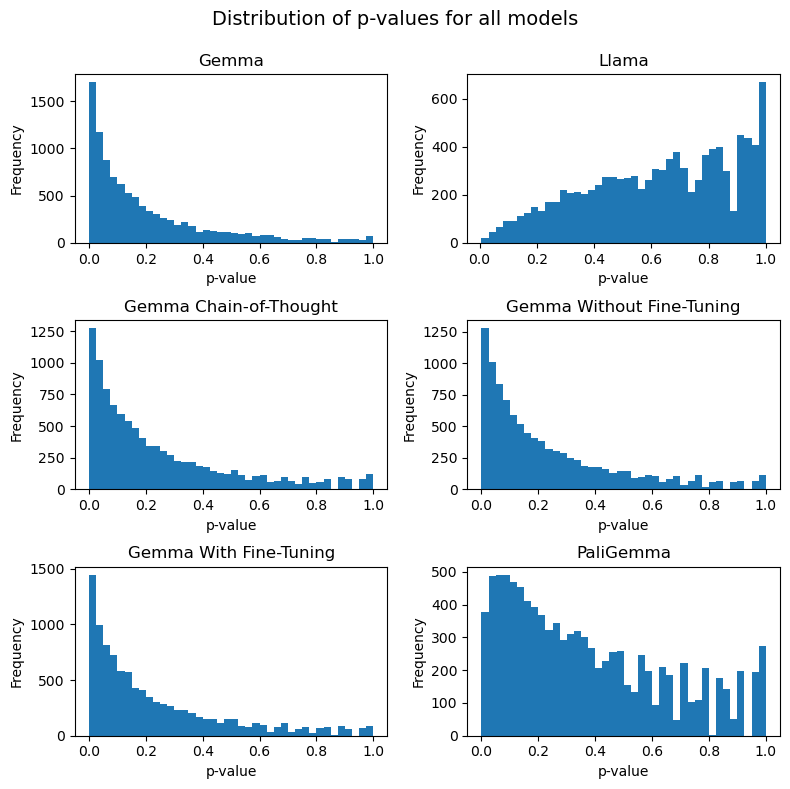

In [50]:
# Plot the distribution of p-values for all models. 
fig, axes = plt.subplots(3, 2, figsize = (8, 8))
fig.suptitle('Distribution of p-values for all models', fontsize = 14)

# Iterate through all models. 
for model_index, model_name in enumerate(model_names):
    ax = axes[model_index // 2, model_index % 2]
    ax.hist(dict_mcnemars_p_values[model_name], bins = 40)
    ax.set_title(model_name)
    ax.set_xlabel('p-value')
    ax.set_ylabel('Frequency')

# Adjust the layout of the subplots. 
plt.tight_layout()
plt.subplots_adjust(top = 0.9)

In [51]:
# Define a function to retrieve fine-tuning vs. no fine-tuning elements. 
def retrieve_finetuning_vs_no_finetuning_elements(model_index, list_dict_predictions, list_brain_regions, list_fmri_scans_indexes):
    
    # Retrieve the predictions, brain region indexes, and fMRI scans indexes. 
    dict_predictions, brain_region_indexes, fmri_scans_indexes = retrieve_foundation_model_elements(model_index, 
                                                                                                    list_dict_predictions,
                                                                                                    list_brain_regions,
                                                                                                    list_fmri_scans_indexes)
    
    # Retrieve the lists of targets and predictions. 
    _, list_targets, list_predictions = create_df_foundation_models(dict_targets_foundation_models, dict_predictions, brain_region_indexes, fmri_scans_indexes)

    # Flatten the lists of targets and predictions. 
    targets_values = np.array(list_targets).flatten()
    predictions_values = np.array(list_predictions).flatten()

    # Detect the cases where the prediction is not equal to -1. 
    selected_predictions = predictions_values != -1

    # Return the targets values, predictions values, and the selected predictions. 
    return targets_values, predictions_values, selected_predictions

In [52]:
# Return the targets values, predictions values, and the selected predictions for fine-tuning vs. no fine-tuning. 
targets_values, predictions_values_no_finetuning, selected_predictions_no_finetuning = retrieve_finetuning_vs_no_finetuning_elements(3,
                                                                                                                                     list_dict_predictions,
                                                                                                                                     list_brain_regions,
                                                                                                                                     list_fmri_scans_indexes)
targets_values, predictions_values_finetuning, selected_predictions_finetuning = retrieve_finetuning_vs_no_finetuning_elements(4,
                                                                                                                               list_dict_predictions,
                                                                                                                               list_brain_regions,
                                                                                                                               list_fmri_scans_indexes)

# Remove the cases where the prediction is -1 for either one of the two models. 
selected_predictions = selected_predictions_no_finetuning * selected_predictions_finetuning
targets_values = targets_values[selected_predictions]
predictions_values_no_finetuning = predictions_values_no_finetuning[selected_predictions]
predictions_values_finetuning = predictions_values_finetuning[selected_predictions]

# Determine the correctness of each model. 
no_finetuning_correct = predictions_values_no_finetuning == targets_values
finetuning_correct = predictions_values_finetuning == targets_values

# Create the 2x2 contingency table. 
a = np.sum(finetuning_correct & no_finetuning_correct)
b = np.sum(finetuning_correct & ~no_finetuning_correct)
c = np.sum(~finetuning_correct & no_finetuning_correct)
d = np.sum(~finetuning_correct & ~no_finetuning_correct)
contingency_table = [[a, b],
                     [c, d]]

# Perform McNemar's test. 
result = mcnemar(contingency_table)

# Store the results in a DataFrame. 
df_summary_mcnemar_finetuning = pd.DataFrame(columns = ['N', 
                                                 'accuracy with fine-tuning', 
                                                 'accuracy without fine-tuning', 
                                                 'p-value'])
df_summary_mcnemar_finetuning.loc['Gemma Without vs. With Fine-Tuning', 'N'] = len(targets_values)
df_summary_mcnemar_finetuning.loc['Gemma Without vs. With Fine-Tuning', 'accuracy with fine-tuning'] = np.mean(targets_values == predictions_values_finetuning)
df_summary_mcnemar_finetuning.loc['Gemma Without vs. With Fine-Tuning', 'accuracy without fine-tuning'] = np.mean(targets_values == predictions_values_no_finetuning)
df_summary_mcnemar_finetuning.loc['Gemma Without vs. With Fine-Tuning', 'p-value'] = result.pvalue

# Display the summary DataFrame. 
df_summary_mcnemar_finetuning

,N,accuracy with fine-tuning,accuracy without fine-tuning,p-value
Gemma Without vs. With Fine-Tuning,838,0.550119,0.545346,0.866017


In [53]:
# Store the general results in a dictionary. 
general_results = dict()
general_results['df_summary_ml_class'] = df_summary_ml_class
general_results['df_summary_ml_reg'] = df_summary_ml_reg
general_results['df_summary_dl_class'] = df_summary_dl_class
general_results['df_summary_dl_reg'] = df_summary_dl_reg
general_results['df_summary_foundation_models'] = df_summary_foundation_models
general_results['df_summary_wilcoxon_finetuning'] = df_summary_wilcoxon_finetuning
general_results['df_summary_mcnemars'] = df_summary_mcnemars
general_results['df_summary_mcnemar_finetuning'] = df_summary_mcnemar_finetuning
general_results['dict_mcnemars_p_values'] = dict_mcnemars_p_values
general_results['df_flops_deep_learning'] = df_flops_deep_learning
general_results['df_flops_foundation_models'] = df_flops_foundation_models

# Save the general results into a Pickle file. 
with open(results_path + 'general_results.p', 'wb') as file:
    pickle.dump(general_results, file)